In [24]:
import matplotlib.pyplot as plt
import pydicom
import os

In [25]:

irm_path = "datas/irm"
rtdose_path = "datas/rtdose"


## IRM datas

In [26]:
datas = []

In [27]:
for file in os.listdir(irm_path):
    if file.endswith(".dcm"):
        print(os.path.join(irm_path, file))
        ds = pydicom.dcmread(os.path.join(irm_path, file))
        datas.append(ds)

datas/irm\1-01.dcm
datas/irm\1-02.dcm
datas/irm\1-03.dcm
datas/irm\1-04.dcm
datas/irm\1-05.dcm
datas/irm\1-06.dcm
datas/irm\1-07.dcm
datas/irm\1-08.dcm
datas/irm\1-09.dcm
datas/irm\1-10.dcm
datas/irm\1-11.dcm
datas/irm\1-12.dcm
datas/irm\1-13.dcm
datas/irm\1-14.dcm
datas/irm\1-15.dcm
datas/irm\1-16.dcm
datas/irm\1-17.dcm
datas/irm\1-18.dcm
datas/irm\1-19.dcm
datas/irm\1-20.dcm
datas/irm\1-21.dcm
datas/irm\1-22.dcm
datas/irm\1-23.dcm
datas/irm\1-24.dcm


In [28]:
array_datas = []
for data in datas:
    array_datas.append(data.pixel_array)

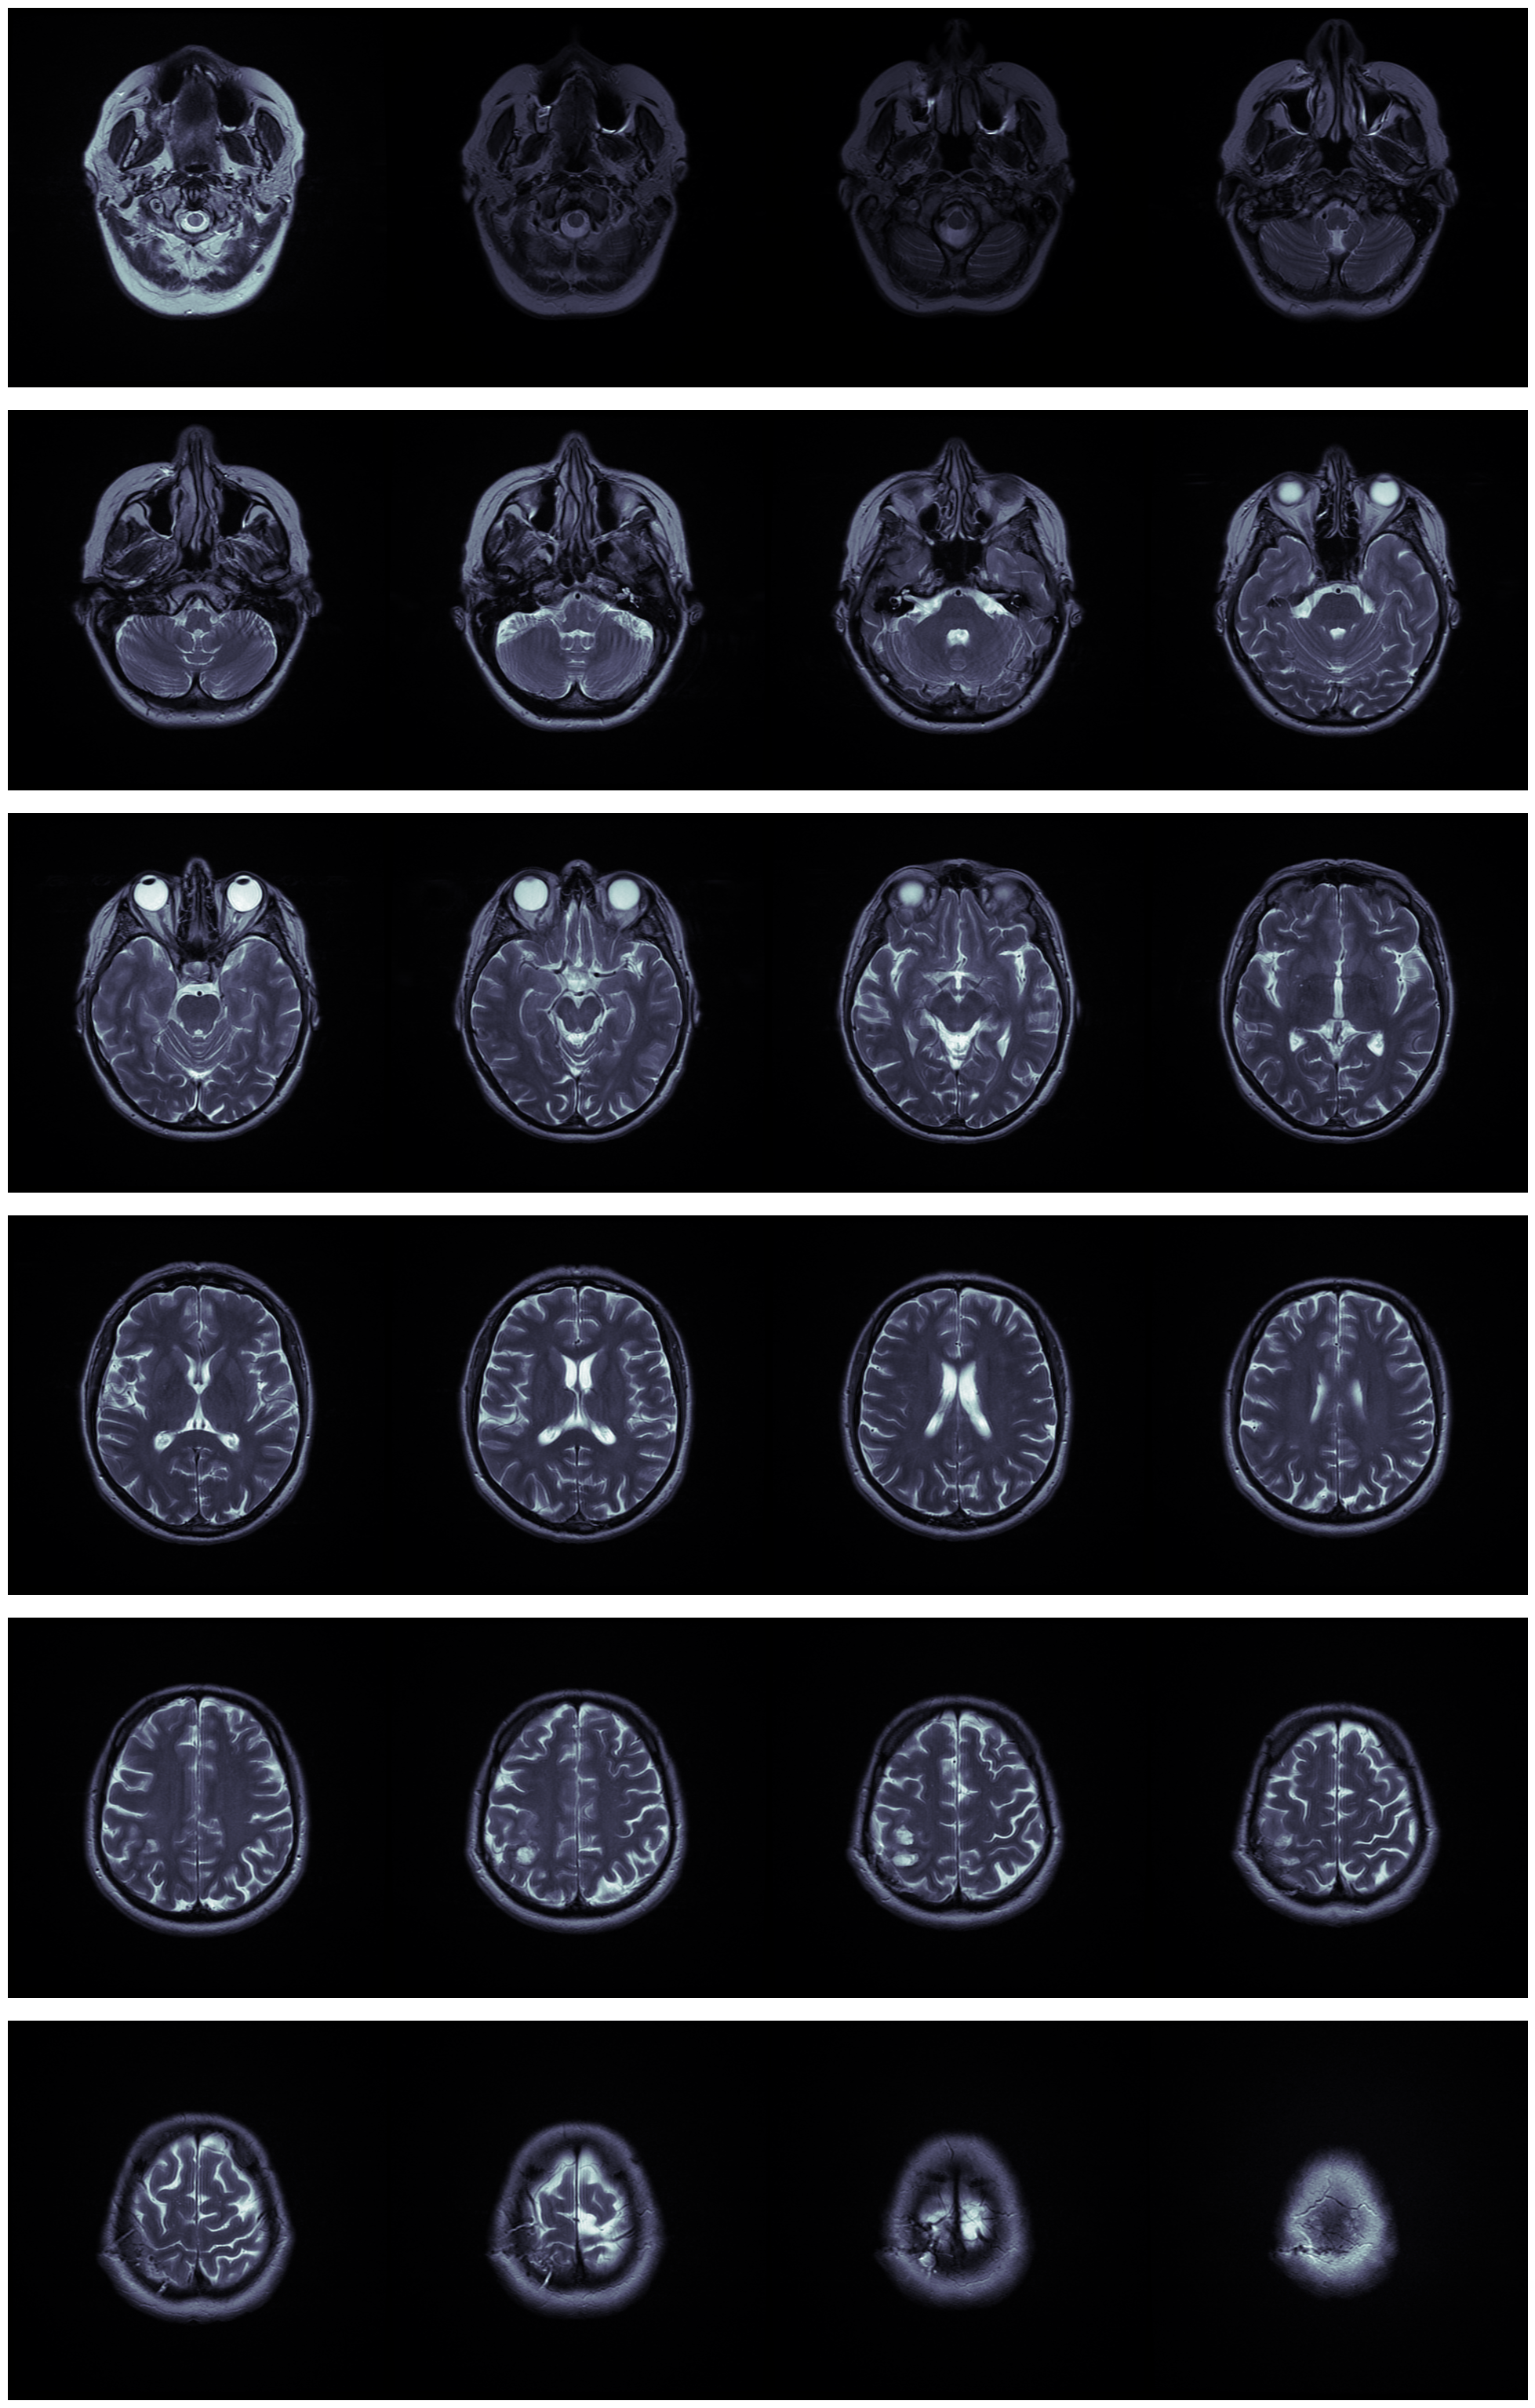

In [29]:
#display irm datas

nline = len(array_datas) // 4

fig, axs = plt.subplots(nline, 4, figsize=(25, 40), gridspec_kw={'wspace': 0, 'hspace': 0})

for i in range(nline):
    for j in range(4):
        axs[i, j].imshow(array_datas[i*4+j], cmap=plt.cm.bone)
        axs[i, j].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [30]:
#get metadata

irmone = datas[0]
print(irmone)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.5291950200507360305685365224344366557
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20040506'
(0008, 0013) Instance Creation Time              TM: '153418'
(0008, 0016) SOP Class UID             

In [31]:
#display irm size

print(array_datas[0].shape)

(512, 512)


## RTDOSE datas

In [32]:
rtdose_datas = []

for file in os.listdir(rtdose_path):
    if file.endswith(".dcm"):
        print(os.path.join(rtdose_path, file))
        ds = pydicom.dcmread(os.path.join(rtdose_path, file))
        rtdose_datas.append(ds)


datas/rtdose\1-1.dcm


In [33]:
array_rtdose_datas = rtdose_datas[0].pixel_array

In [34]:
#get metadata

rtdoseone = datas[0]
print(rtdoseone)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.5291950200507360305685365224344366557
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20040506'
(0008, 0013) Instance Creation Time              TM: '153418'
(0008, 0016) SOP Class UID             

In [35]:
#display rtdose size

print(array_rtdose_datas.shape)

(186, 207, 356)


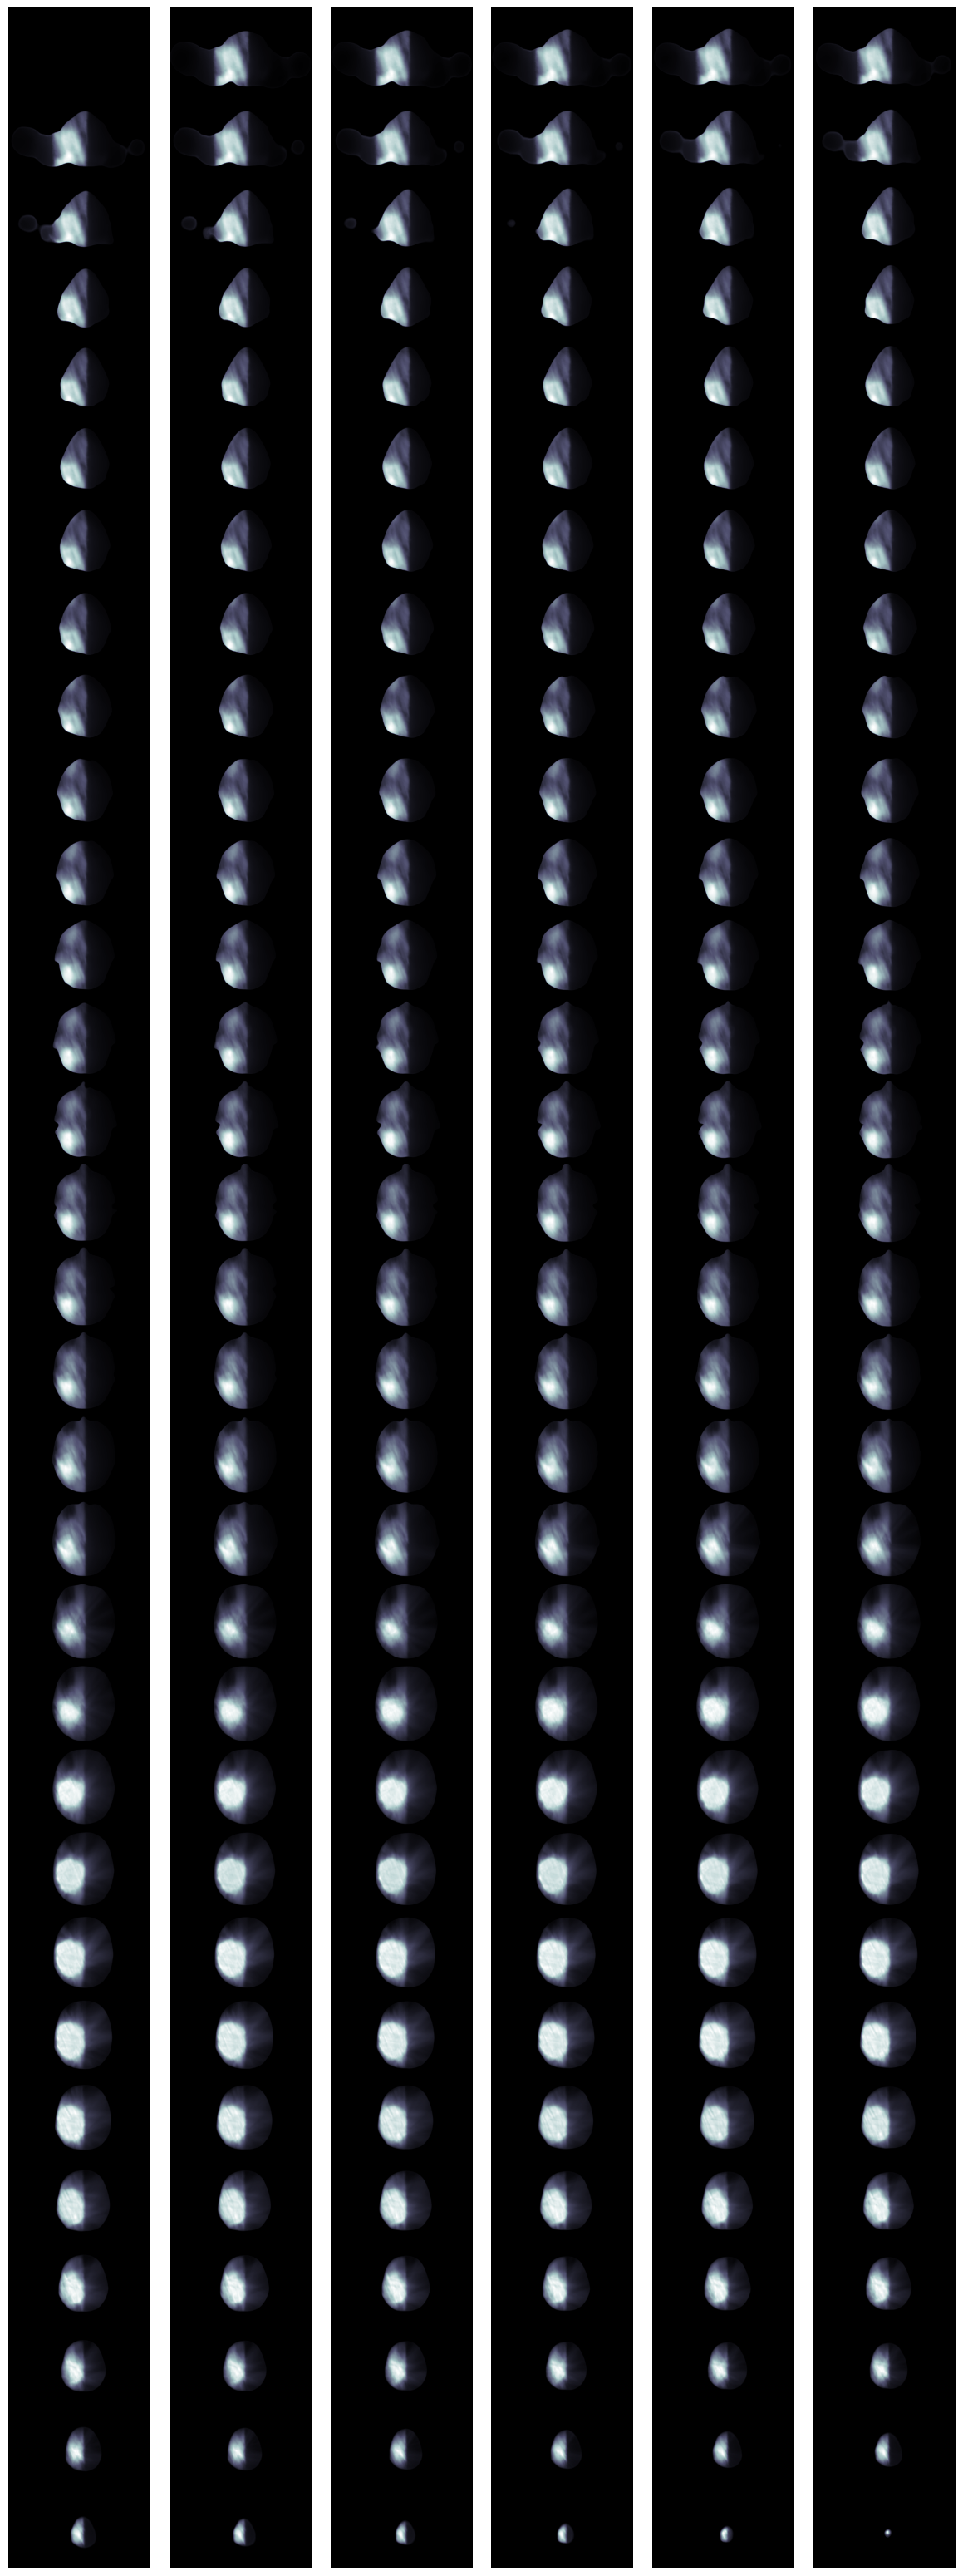

In [36]:
#display rtdose datas


nline = len(array_rtdose_datas) // 6

fig, axs = plt.subplots(nline, 6, figsize=(15, 40), gridspec_kw={'wspace': 0, 'hspace': 0})

for i in range(nline):
    for j in range(6):
        axs[i, j].imshow(array_rtdose_datas[i*6+j], cmap=plt.cm.bone)
        axs[i, j].axis('off')
        

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Fiting rtdose array

In [38]:
import numpy as np
from scipy.interpolate import interp2d

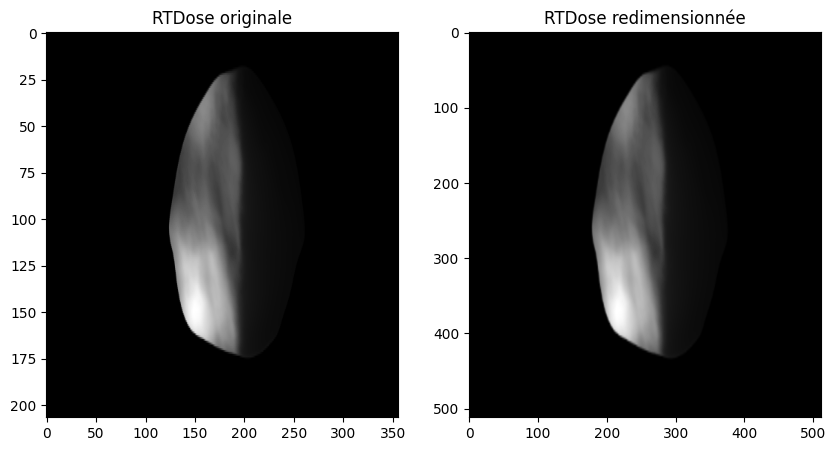

In [39]:
original_array = array_rtdose_datas[50]

new_shape = (512, 512)

interp_func = interp2d(np.linspace(0, 1, original_array.shape[1]), 
                       np.linspace(0, 1, original_array.shape[0]), 
                       original_array, kind='linear')

stretched_array = interp_func(np.linspace(0, 1, new_shape[1]), np.linspace(0, 1, new_shape[0]))



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_array, cmap='gray', aspect='auto')
plt.title('RTDose originale')

plt.subplot(1, 2, 2)
plt.imshow(stretched_array, cmap='gray', aspect='auto')
plt.title('RTDose redimensionnée')

plt.show()

## Read nifti files

In [19]:
import nibabel as nib
from ipywidgets import interact
from ipywidgets import IntSlider

In [20]:
def show_irm(index):
    plt.imshow(data[:, :, index], cmap="bone", origin="lower")
    plt.title(f"IRM - Tranche {index}")
    plt.colorbar()
    plt.show()

Tumeur : 105

In [21]:

nifti_path = "datas/nifti/irm/4.000000-MR00T1-28157.nii.gz"

img = nib.load(nifti_path)
data = img.get_fdata()


interact(show_irm, index=IntSlider(min=0, max=data.shape[2]-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='index', max=149), Output()), _dom_classes=('widget-inter…

<function __main__.show_irm(index)>

In [22]:

nifti_path = "datas/nifti/irm/2.000000-CT00CT-58964.nii.gz"

img = nib.load(nifti_path)
data = img.get_fdata()


interact(show_irm, index=IntSlider(min=0, max=data.shape[2]-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='index', max=197), Output()), _dom_classes=('widget-inter…

<function __main__.show_irm(index)>